## Setup

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
sns.set(style="whitegrid")# SNS set up
final = pd.read_csv("final.csv") # Import the dataset
final.drop('Unnamed: 0', inplace=True, axis =1) # Need to deal with the columns being different types

In [60]:
# Small dataset for correlation matrix
small = final.iloc[:, : 17] # Select all the columns that are not from one hot encoding
small['logitems'] = np.log(small['items'])
small['logquantity'] = np.log(small['quantity'])
small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 19 columns):
date_open                       3652 non-null float64
number_of_patients              3652 non-null float64
join_parent_date                3652 non-null float64
left_parent_date                2869 non-null float64
items                           3652 non-null float64
nic                             3652 non-null float64
act.cost                        3652 non-null float64
quantity                        3652 non-null float64
bnf.chapter                     3652 non-null int64
bnf.section                     3652 non-null int64
bnf.paragraph                   3652 non-null int64
ccg_code1                       3652 non-null int64
high_level_health_geography1    3652 non-null int64
commissioner1                   3652 non-null int64
sha1                            3652 non-null int64
bnf.name1                       3652 non-null int64
e8...1                          3652 non-null

# Initial boxplots

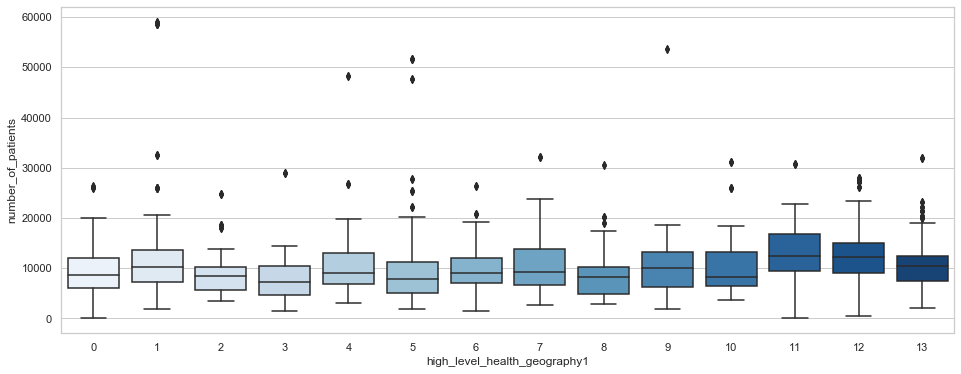

In [42]:
plt.figure(figsize=(16, 6))
cmap = sns.diverging_palette(15, 220, as_cmap=True, center="light", s = 99)
sns.boxplot(y=small['number_of_patients'], x=small["high_level_health_geography1"], palette="Blues") # The x value is what it will be separated by

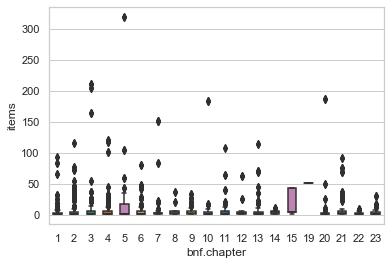

In [81]:
#small.boxplot(by='bnf.chapter', column=['items'], grid=False, figsize=(12,12)) # Need to check which columns the NHS came up with 

# Different way to achieve the same thing
bplot = sns.boxplot(y='items', x='bnf.chapter', data=small, width=0.5, palette="colorblind")

#bplot=sns.stripplot(y='items', x='bnf.chapter', data=small, 
                   #jitter=True, marker='o', alpha=0.5,
                   #color='black', figsize=(12,12))

# Correlation matrix

([<matplotlib.axis.YTick at 0x1a1ecc2550>,
 <a list of 17 Text yticklabel objects>)

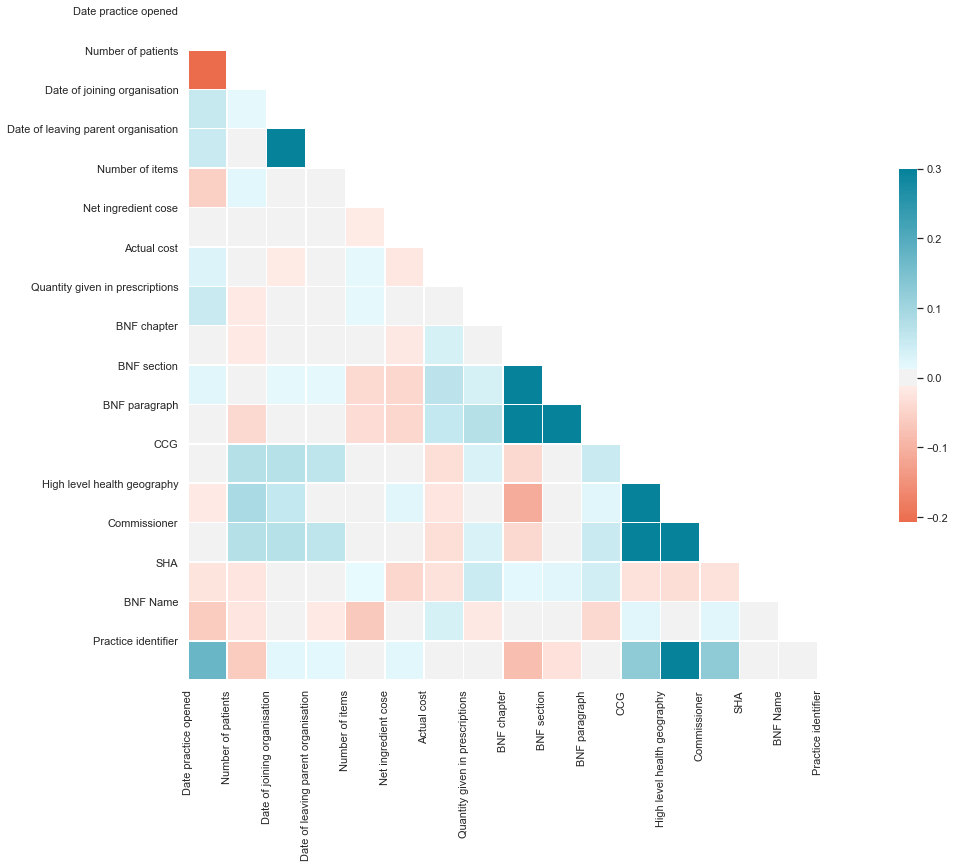

In [34]:
corr = small.corr() # Compute the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(15, 13)) # Set up the matplotlib figure
cmap = sns.diverging_palette(15, 220, as_cmap=True, center="light", s = 99) # Generate a custom diverging colormap, have changed so red is negative
    # center = whether white or black in middle of colour range
    # s : saturation. Integer 1 - 100
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
           ) # Draw the heatmap with the mask and correct aspect ratio
list_labels = ('Date practice opened', 'Number of patients', 'Date of joining organisation', 'Date of leaving parent organisation',
               'Number of items', 'Net ingredient cost', 'Actual cost', 'Quantity given in prescriptions', 
               'BNF chapter', 'BNF section', 'BNF paragraph', 'CCG', 'High level health geography', 'Commissioner', 'SHA', 
               'BNF Name', 'Practice identifier')
plt.xticks(np.arange(17), list_labels) # Change the x axis labels to actual names
plt.yticks(np.arange(17), list_labels ) # Change the y axis labels

In [ ]:
# Group by practice if needed
list(x_grouped)[0]

# Histograms

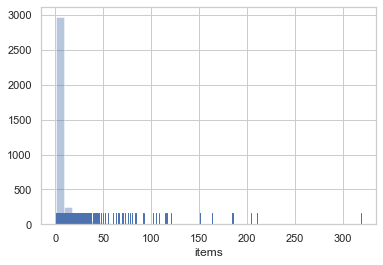

In [77]:
sns.distplot(small['items'], rug=True, kde=False, bins = 40)

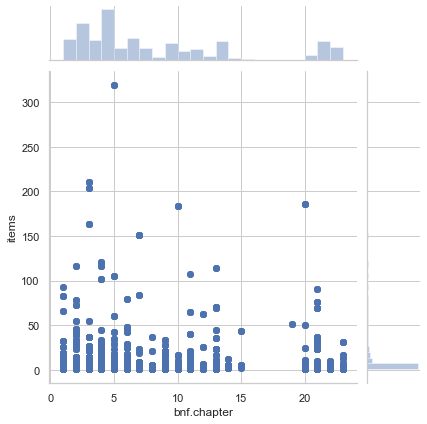

In [84]:
sns.jointplot(x="bnf.chapter", y="items", data=small)

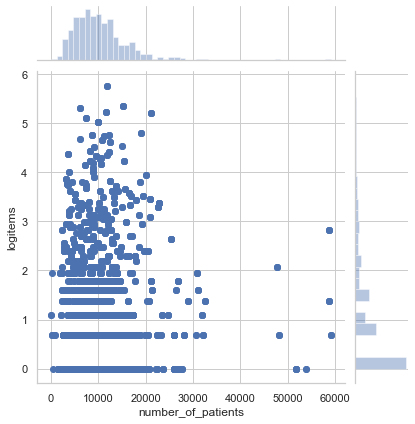

In [92]:
# May be better to look at items on a log scale?
sns.jointplot(x="number_of_patients", y="logitems", data=small)

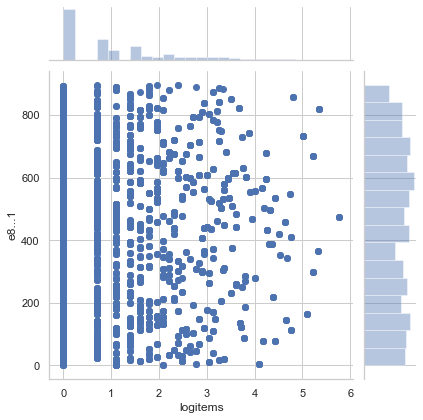

In [99]:
sns.jointplot(x="logitems", y="e8...1", data=small)

In [107]:
#for i in small.columns:
    #plt.figure()
    #plt.hist(small[i])
    
# Plots a histogram for every column in the small dataset

# Barplots

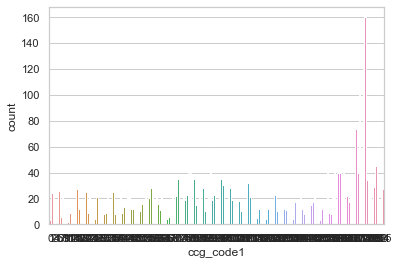

In [117]:
sns.countplot(x='ccg_code1', data=small) # CCG and commissioner1 give the same plot

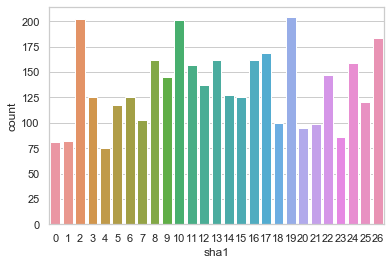

In [119]:
sns.countplot(x='sha1', data=small) # There are 28 SHA's 

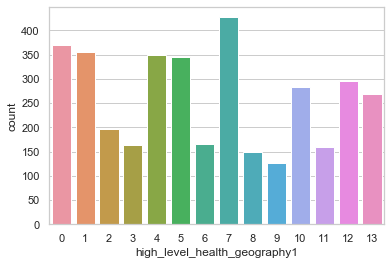

In [120]:
sns.countplot(x='high_level_health_geography1', data=small)  # There are 13 high level health geographies

# Kernel density distributions

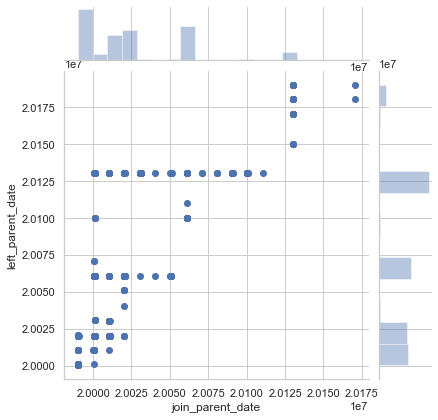

In [53]:
sns.jointplot(x="join_parent_date", y="left_parent_date", data=small)

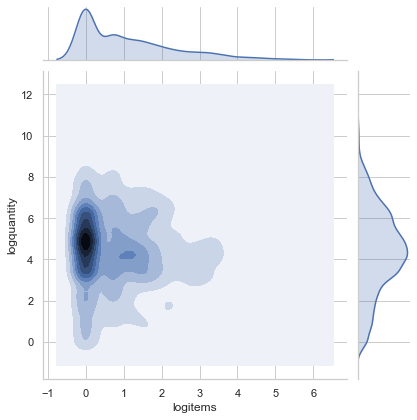

In [61]:
sns.jointplot(x="logitems", y="logquantity", data=small, kind="kde")

# Save file as a jpeg

In [ ]:
# Save a file as a jpeg
plot_file_name="boxplot_and_swarmplot_with_seaborn.jpg" # This might not be needed to be honest
bplot.figure.savefig(plot_file_name,format='jpeg', dpi=100)